# Práctica seguimiento

Participantes:
- Gerardo León Quintana
- Susana Suárez Mendoza

In [1]:
import os
import matplotlib.pyplot as plt
import ast
import pandas as pd

## 1. Cargar los resultados

In [2]:
def parse_txt_file(file_path):
    data = {}
    with open(file_path, 'r') as f:
        for line in f:
            if ':' in line:
                key, value = line.split(':', 1)
                key = key.strip()
                try:
                    value = ast.literal_eval(value.strip())
                except (ValueError, SyntaxError):
                    value = value.strip()
                data[key] = value
    return data

def load_data_from_folder(folder_path):
    data = {}

    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            method_name = os.path.splitext(filename)[0]
            print(f'Loading data for method {method_name} from {file_path}')

            file_data = parse_txt_file(file_path)
            data[method_name] = file_data
    
    return data

In [3]:
folder_path = './resultados'

loaded_data = load_data_from_folder(folder_path)

Loading data for method tracking_farneback from ./resultados\tracking_farneback.txt
Loading data for method tracking_lk_mano from ./resultados\tracking_lk_mano.txt
Loading data for method tracking_lk_opencv from ./resultados\tracking_lk_opencv.txt
Loading data for method tracking_raft_large from ./resultados\tracking_raft_large.txt
Loading data for method tracking_raft_small from ./resultados\tracking_raft_small.txt
Loading data for method tracking_yolo from ./resultados\tracking_yolo.txt


## 2. Graficar los resultados

In [4]:
legend_labels = {
    'tracking_yolo': 'YOLO+distancia',
    'tracking_farneback': 'Farneback',
    'tracking_lk_mano': 'Lucas-Kanade (Mano)',
    'tracking_lk_opencv': 'Lucas-Kanade (OpenCV)',
    'tracking_raft_small': 'RAFT (small)',
    'tracking_raft_large': 'RAFT (large)',
}

colors = {
    'tracking_yolo': 'red',
    'tracking_farneback': 'blue',
    'tracking_lk_mano': 'green',
    'tracking_lk_opencv': 'orange',
    'tracking_raft_small': 'purple',
    'tracking_raft_large': 'yellow',
}

### 2.1 Trayectoria en x(t)

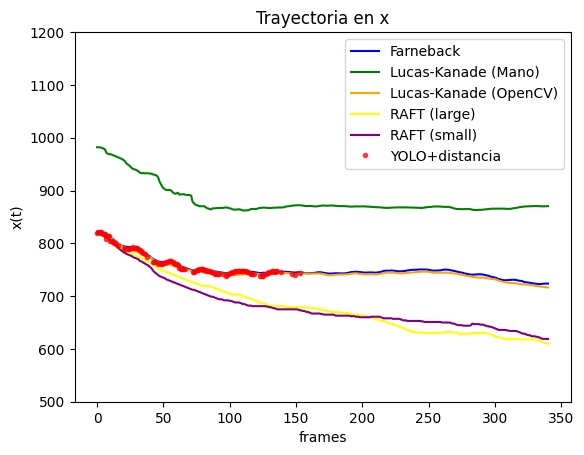

In [108]:
plt.figure()

for key, value in loaded_data.items():
    x_skip = value['x_skip']
    frames = value['time_frame']
    label = legend_labels.get(key, key)
    color = colors.get(key, 'black')
    if key == 'tracking_yolo':
        plt.plot(frames, x_skip, label=label, linestyle='', marker='.',color=color, alpha=0.7)
    else:
        plt.plot(frames, x_skip, label=label,color=color)

plt.xlabel('frames')
plt.ylabel('x(t)')
plt.ylim(500, 1200)
plt.title('Trayectoria en x')
plt.legend(loc='upper right')
plt.savefig('trayectoria_x.svg', format='svg')
plt.show()

### 2.2 Trayectoria en y(t)

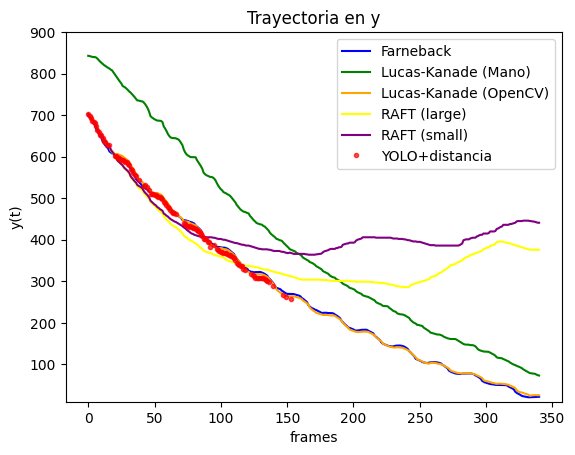

In [109]:
plt.figure()

for key, value in loaded_data.items():
    y_skip = value['y_skip']
    frames = value['time_frame']
    label = legend_labels.get(key, key)
    color = colors.get(key, 'black')
    if key == 'tracking_yolo':
        plt.plot(frames, y_skip, label=label, linestyle='', marker='.',color=color, alpha=0.7)
    else:
        plt.plot(frames, y_skip, label=label,color=color)

plt.xlabel('frames')
plt.ylabel('y(t)')
plt.ylim(10, 900)
plt.title('Trayectoria en y')
plt.legend(loc='upper right')
plt.savefig('trayectoria_y.svg', format='svg')
plt.show()

### 2.3 Trayectoria en x(t) e y(t)

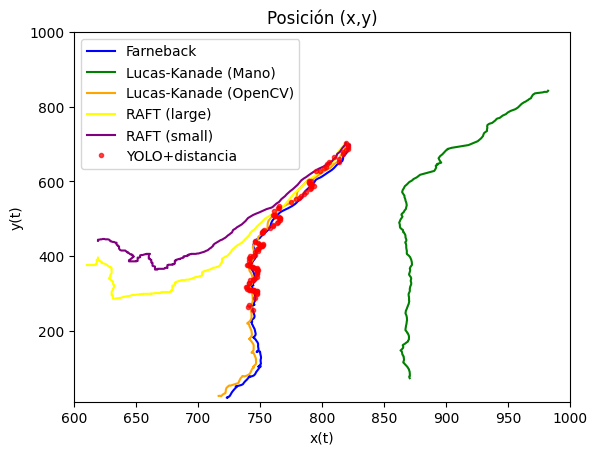

In [110]:
plt.figure()

for key, value in loaded_data.items():
    x_skip = value['x_skip']
    y_skip = value['y_skip']
    label = legend_labels.get(key, key)
    color = colors.get(key, 'black')
    if key == 'tracking_yolo':
        plt.plot(x_skip, y_skip, label=label, linestyle='', marker='.',color=color, alpha=0.7)
    else:
        plt.plot(x_skip, y_skip, label=label,color=color)

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.ylim(10, 1000)
plt.xlim(600, 1000)
plt.title('Posición (x,y)')
plt.legend(loc='upper left')
plt.savefig('posicion_xy.svg', format='svg')
plt.show()

### 2.4 Velocidad 

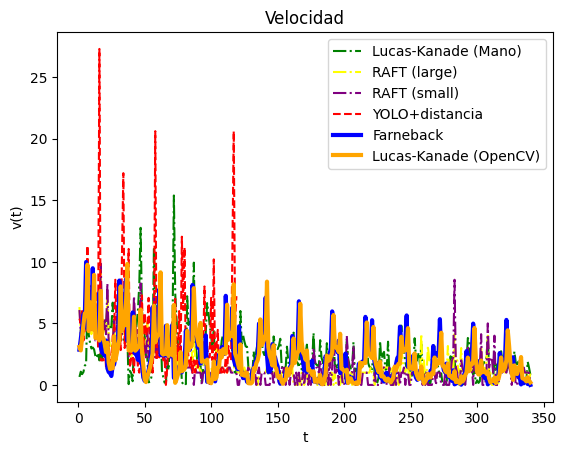

In [16]:
plt.figure()

for key, value in loaded_data.items():
    v = value['speed']
    t = value['time_frame']
    label = legend_labels.get(key, key)
    color = colors.get(key, 'black')
    if key == 'tracking_yolo':
        t = value['time']
        plt.plot(t[1:], v, label=label, color=color, linestyle='--')
    elif key == 'tracking_farneback':
        farneback_v = value['speed']
        farneback_t = value['time_frame']
    elif key == 'tracking_lk_opencv':  
        lk_opencv = value['speed']
        lk_t = value['time_frame']
    else:
        plt.plot(t[1:], v, label=label,color=color, linestyle='dashdot')

plt.plot(farneback_t[1:], farneback_v, label='Farneback', color='blue', linewidth=3)
plt.plot(lk_t[1:], lk_opencv, label='Lucas-Kanade (OpenCV)', color='orange', linewidth=3)
plt.xlabel('t')
plt.ylabel('v(t)')
plt.title('Velocidad')
plt.legend(loc='upper right')
plt.savefig('velocidad.svg', format='svg')
plt.show()

### 2.5 Tiempos de ejecución 

In [107]:
data = {}

for key, value in loaded_data.items():
    spent_time = value['time_spent']
    label = legend_labels.get(key, key)
    data[label] = spent_time

dataframe_spent_times = pd.DataFrame(list(data.items()), columns=["Method", "Time Spent"])
display(dataframe_spent_times)

,Method,Time Spent
0,Farneback,149.563331
1,Lucas-Kanade (Mano),21.888511
2,Lucas-Kanade (OpenCV),9.581177
3,RAFT (large),1791.337921
4,RAFT (small),572.139227
5,YOLO+distancia,287.963078


## 3. Conclusiones

En cuanto a cada método, se pueden sacar las siguientes conclusiones:
- **YOLO + distancia**: esta implementación no ha sido capaz de detectar la trayectoria al completo y además, su tiempo de ejecución es muy elevado.
- **Farneback**: este método detecta la trayectoria al completo, y además, es se acerca bastante a la realidad de la trayectoria. Sin embargo, no es uno de los métodos más eficientes y rápidos computacionalmente.
- **Lucas-Kanade**: este método detecta la trayectoria al completo si se utiliza la implementación de  la librería de `OpenCV`. Por otro lado, destaca que es el más rápido de todos y el más eficiente.
- **RAFT**: la implementación mediante la red neuronal `RAFT` es la más inexacta de todas, llegando a confundir la trayectoria y la que más tiempo de ejecución necesita.

Finalmente, se puede concluir que el método más adecuado para esta tarea en concreto y teniendo en cuenta los recursos computacionales es el método de Lucas-Kanade mediante la librería de `OpenCV`.